In [1]:
from tensorflow import keras
import numpy as np
from keras.utils import np_utils
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras import Sequential
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
model = Sequential(name='lenet')
model.add(BatchNormalization(input_shape=(227, 227, 1)))
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [3]:
model.summary()

Model: "lenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 227, 227, 1)      4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 6)       156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                             

In [4]:
image_shape=(227,227)
train_dir="/notebooks/ultrasound/train"
validation_dir=train_dir
test_dir="/notebooks/ultrasound/val"
batch_size=64
test_train_split=0.3

train_data = image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=image_shape ,\
      subset='training',seed=88, validation_split=test_train_split,\
      batch_size=batch_size)
validation_data = image_dataset_from_directory(validation_dir,
      color_mode="grayscale",image_size=image_shape, subset='validation',seed=88,\
      validation_split=test_train_split,batch_size=batch_size)
test_data = image_dataset_from_directory(test_dir,
      color_mode="grayscale",image_size=image_shape, batch_size=batch_size)

Found 8116 files belonging to 2 classes.
Using 5682 files for training.
Found 8116 files belonging to 2 classes.
Using 2434 files for validation.
Found 900 files belonging to 2 classes.


In [5]:
model.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [6]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [7]:
history = model.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 6s 33ms/step - loss: 0.5312 - binary_accuracy: 0.7684 - val_loss: 0.3833 - val_binary_accuracy: 0.8200
Epoch 2/100
89/89 [==============================] - 3s 30ms/step - loss: 0.1875 - binary_accuracy: 0.9289 - val_loss: 0.1829 - val_binary_accuracy: 0.9187
Epoch 3/100
89/89 [==============================] - 3s 32ms/step - loss: 0.0643 - binary_accuracy: 0.9778 - val_loss: 0.1296 - val_binary_accuracy: 0.9499
Epoch 4/100
89/89 [==============================] - 3s 30ms/step - loss: 0.0365 - binary_accuracy: 0.9870 - val_loss: 0.1068 - val_binary_accuracy: 0.9638
Epoch 5/100
89/89 [==============================] - 3s 30ms/step - loss: 0.0241 - binary_accuracy: 0.9930 - val_loss: 0.1136 - val_binary_accuracy: 0.9606
Epoch 6/100
89/89 [==============================] - 3s 31ms/step - loss: 0.0168 - binary_accuracy: 0.9952 - val_loss: 0.0964 - val_binary_accuracy: 0.9696
Epoch 7/100
89/89 [==============================] - 3s 31ms/ste

In [8]:
epochs_run=len(history.epoch)

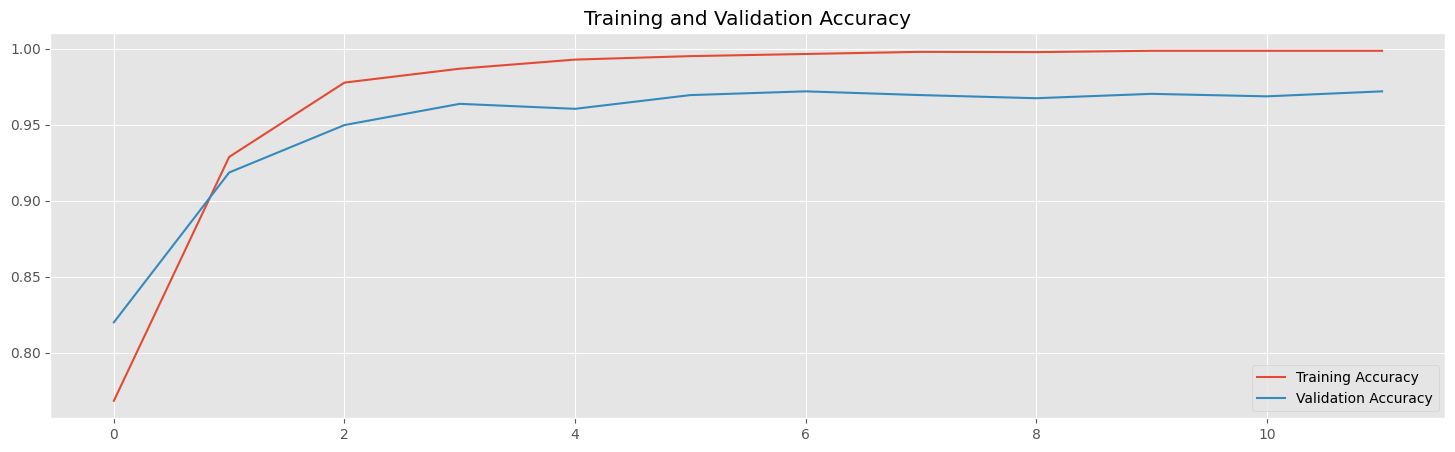

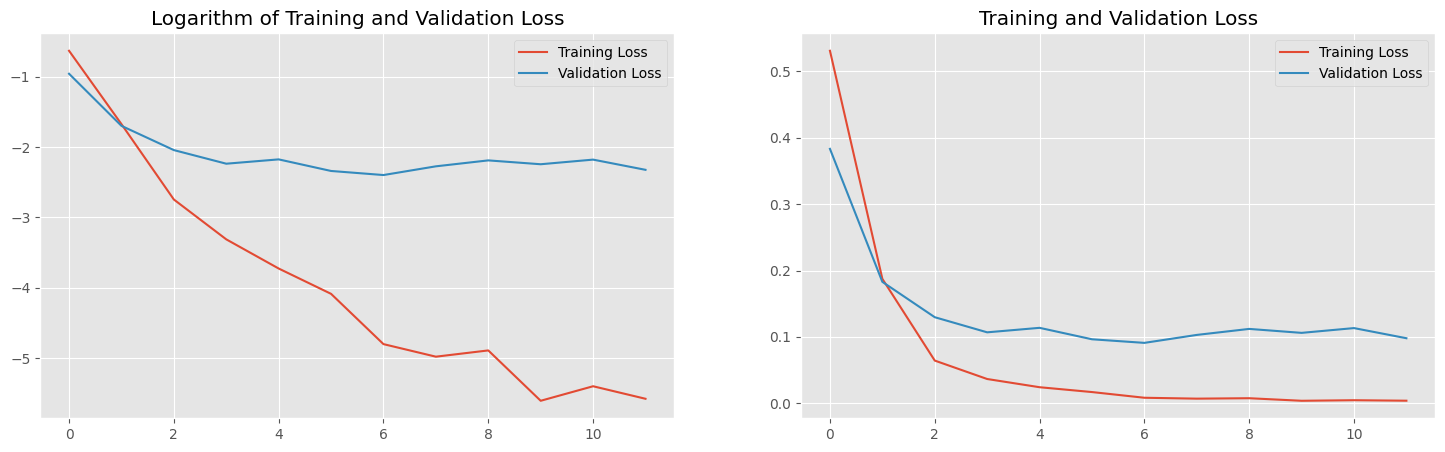

In [9]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()


In [10]:
results = model.evaluate(test_data)
print("test loss, test acc:", results)

15/15 [==============================] - 0s 12ms/step - loss: 1.0147 - binary_accuracy: 0.8022
test loss, test acc: [1.014662504196167, 0.8022222518920898]


In [11]:
model.save("../models/lenet5_0_ultrasound")

INFO:tensorflow:Assets written to: ../models/lenet5_0_ultrasound/assets


INFO:tensorflow:Assets written to: ../models/lenet5_0_ultrasound/assets
